In [12]:
#setting parameters
import random
import math
p=0.95#the threshold of probability 
N=100#number of nodes in the graph
disthres=0.12
from Connect import is_connect,find_component

In [13]:
#generating the tested graph
#the existence of the edge between any two nodes is subjected to an uniform distribution on (0,1)
a=[0]*N
b=[0]*N
for x in range(N):
    a[x]=random.uniform(0,1)
    b[x]=random.uniform(0,1)
mat=[]#adjacent matrix
for x in range(N):
	mat.append([0]*N)
for x in range(N):
	for y in range(x+1,N):
		if random.uniform(0,1)<p and math.sqrt((a[x]-a[y])**2+(b[x]-b[y])**2)<disthres:
			mat[x][y]=1
			mat[y][x]=1

In [14]:
pip install matplotlib


The following command must be run outside of the IPython shell:

    $ pip install matplotlib

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more informations on how to install packages:

    https://docs.python.org/3/installing/


The graph is not connected


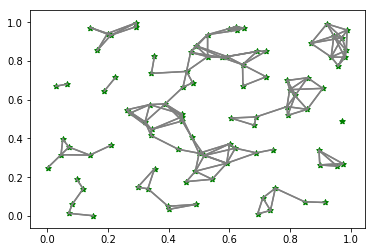

In [15]:
#test if the graph is connected
import matplotlib.pyplot as plt
plt.scatter(a,b,label="nodes",color="green",marker="*",s=30)
for x in range(N):
    for y in range(x+1,N):
        if mat[x][y]==1:
            plt.plot([a[x],a[y]],[b[x],b[y]],color="grey")
plt.scatter(a,b,label="nodes",color="green",marker="*",s=30)
for x in range(N):
    for y in range(x+1,N):
        if mat[x][y]==1:
            plt.plot([a[x],a[y]],[b[x],b[y]],color="grey")
is_connect(mat)

0,20,30,42,56,62,69,54,88,19,45,33,71,14,67,99,70,16,11,47,73,81,52,44,65,1,32,76,10,29,51,55,68,28,97,12,27,23,4,37,59,72
2,40
3,5,34,60,13,7
6,50,78,96,61,77
8,22,24,63,89,49,95,80,64
9,46,92,53,35,39,41,58,86,87,90
15,48,25,43,21
17,18,98,31,66,93
26,38,79,82
36,75,83,91,57,84
74
85,94


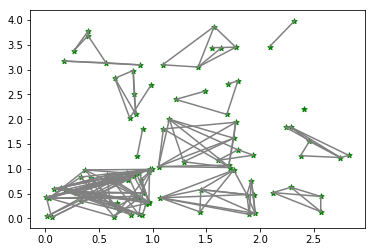

In [16]:
#find all the connected components in a graph
comp=find_component(mat)
numcomp=len(comp)
m=math.ceil(math.sqrt(numcomp))
xpos=[0]*N
ypos=[0]*N
for k in range(m):
    for r in range(m):
        ind=k*m+r
        if ind<numcomp:
            for nt in comp[ind]:
                xpos[nt]=random.uniform(k,k+1)
                ypos[nt]=random.uniform(r,r+1)
plt.scatter(xpos,ypos,label="nodes",color="green",marker="*",s=30)
for x in range(N):
    for y in range(x+1,N):
        if mat[x][y]==1:
            plt.plot([xpos[x],xpos[y]],[ypos[x],ypos[y]],color="grey")
            

The component consisting of the nodes:

0,13,17,30,58,63,33,14,19,21,64,72,29,31,50,59,7,26,70,85,76,8,73,66,49,6,77,74,60,99,94,54,55
has a cycle consisting of the nodes:

13,17,0
The component consisting of the nodes:

1,9,10,11,18,22,34,40,48,78,80,98,15,75,89,4,12,25,37,81,47,28,61,95,57,79,2,16,39,38,36,96,69,5,32,43,65,92
has a cycle consisting of the nodes:

9,10,1
The component consisting of the nodes:

3,42
has no cycle

The component consisting of the nodes:

20,56,84,87,91,52,83
has a cycle consisting of the nodes:

56,87,20
The component consisting of the nodes:

23,35,71,82,90,93,53,45,97
has a cycle consisting of the nodes:

35,71,23
The component consisting of the nodes:

24,88
has no cycle

The component consisting of the nodes:

27,51,68,86,44,67
has a cycle consisting of the nodes:

51,68,27
The component consisting of the nodes:

41
has no cycle

The component consisting of the nodes:

46
has no cycle

The component consisting of the nodes:

62
has no cycle



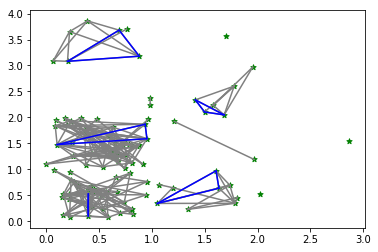

In [6]:
#find for each connected component if there is any cycle
from CycleGen import detect_cycle_gen
res=detect_cycle_gen(mat)
comp=res[0]
cmpcycle=res[1]
plt.scatter(xpos,ypos,label="nodes",color="green",marker="*",s=30)
for x in range(N):
    for y in range(x+1,N):
        if mat[x][y]==1:
            plt.plot([xpos[x],xpos[y]],[ypos[x],ypos[y]],color="grey")
for cycle in cmpcycle:
    if cycle!=[]:
        for t in range(len(cycle)-1):
            x=cycle[t]
            y=cycle[t+1]
            if mat[x][y]==1:
                plt.plot([xpos[x],xpos[y]],[ypos[x],ypos[y]],color="blue")
        x=cycle[len(cycle)-1]
        y=cycle[0]
        if mat[x][y]==1:
            plt.plot([xpos[x],xpos[y]],[ypos[x],ypos[y]],color="blue")